In [1]:
import sys
sys.version

'3.8.0 (default, Oct 14 2019, 23:13:30) \n[GCC 5.4.0 20160609]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fn = "../data/MEASLES_Cases_1909-2001_20150322001618.csv"
p = pd.read_csv(fn,skiprows=2,na_values=["-"])


In [3]:
pp = p.loc[:,"ALABAMA":]
num_nan = np.isnan(pp).sum(axis=1)
num_nan.head()
pp.shape

(4861, 60)

In [4]:
pp2 = pp[num_nan<pp.shape[1]]
pp2.shape

(3569, 60)

In [5]:
pmax = pp2.max(axis=1)
min(pmax)
max(pmax)

53000.0

(array([142., 302., 339., 439., 664., 573., 547., 532.,  30.,   1.]),
 array([0.        , 0.47242841, 0.94485681, 1.41728522, 1.88971363,
        2.36214203, 2.83457044, 3.30699884, 3.77942725, 4.25185566,
        4.72428406]),
 <a list of 10 Patch objects>)

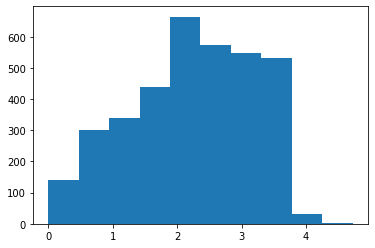

In [6]:
plt.hist(np.log10(pmax+1))

In [7]:
pp2[pmax>10000]

,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Unnamed: 61
2355,510.0,19.0,NaN,109.0,124.0,1569.0,96.0,21.0,13.0,75.0,...,NaN,264.0,36.0,NaN,592.0,675.0,129.0,292.0,37.0,NaN
3494,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,6.0,NaN,1.0,53000.0,NaN,NaN,6.0,18.0,NaN,NaN


In [8]:
pmaxc = pp2.max(axis=0)
pmaxc

ALABAMA                      7101.0
ALASKA                        232.0
AMERICAN SAMOA                  1.0
ARIZONA                       977.0
ARKANSAS                     1536.0
CALIFORNIA                   6930.0
COLORADO                     2112.0
CONNECTICUT                  2228.0
DELAWARE                      431.0
DISTRICT OF COLUMBIA          752.0
FLORIDA                      1721.0
GEORGIA                      2122.0
GUAM                           48.0
HAWAII                        784.0
IDAHO                         446.0
ILLINOIS                     6933.0
INDIANA                      2319.0
IOWA                         5251.0
KANSAS                       1785.0
KENTUCKY                    10402.0
LOUISIANA                    1308.0
MAINE                         839.0
MARYLAND                     2597.0
MASSACHUSETTS                3662.0
MICHIGAN                     6587.0
MINNESOTA                    2452.0
MISSISSIPPI                  1760.0
MISSOURI                    

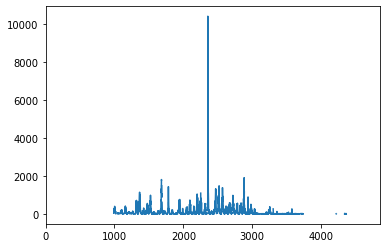

In [9]:
p.KENTUCKY.plot()

In [12]:
pp2.loc[pp2["KENTUCKY"]>10000,"KENTUCKY"]=np.NaN

<ipython-input-12-a6862319c32c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp2.loc[pp2["KENTUCKY"]>10000,"KENTUCKY"]=np.NaN


In [16]:
print(max(pp2.KENTUCKY))
pp2.KENTUCKY.max()

nan


2699.0

In [25]:
max(pp2.max())

53000.0

In [30]:
p["CAT"] = pd.qcut(p.YEAR,q=3)

In [31]:
p.columns

Index(['YEAR', 'WEEK', 'ALABAMA', 'ALASKA', 'AMERICAN SAMOA', 'ARIZONA',
       'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'GUAM', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NEW YORK CITY', 'NORTH CAROLINA', 'NORTH DAKOTA',
       'NORTHERN MARIANA ISLANDS', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PAC TRUST TERR', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND',
       'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS',
       'UPSTATE NEW YORK', 'UTAH', 'VERMONT', 'VIRGIN ISLANDS', 'VIRGINIA',
       'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'Unnamed: 61',
       'CAT'],
      dtype='object')

In [37]:
p.groupby(by=[p.WEEK,p.CAT]).aggregate(sum)

YEAR  ALABAMA  ALASKA  AMERICAN SAMOA  ARIZONA  \
WEEK CAT                                                                   
1    (1908.999, 1940.0]  61584   1021.0     0.0             0.0    184.0   
     (1940.0, 1971.0]    62602   1420.0   429.0             0.0   1708.0   
     (1971.0, 2001.0]    59595      2.0     0.0             0.0     15.0   
2    (1908.999, 1940.0]  61584   1271.0     0.0             0.0    257.0   
     (1940.0, 1971.0]    60636   1451.0   475.0             0.0   2078.0   
...                        ...      ...     ...             ...      ...   
52   (1940.0, 1971.0]    60636    689.0   267.0             0.0    927.0   
     (1971.0, 2001.0]    59595      0.0     0.0             0.0      0.0   
53   (1908.999, 1940.0]   9622    235.0     0.0             0.0    133.0   
     (1940.0, 1971.0]    11731     32.0     0.0             0.0     28.0   
     (1971.0, 2001.0]     9930      0.0     0.0             0.0      1.0   

                         ARKANSAS  CALIFORNIA  COLORADO  CONNECTICUT  \
WEEK CAT                                                               
1    (1908.999, 1940.0]     571.0      3053.0     836.0       2095.0   
     (1940.0, 1971.0]      1040.0      7841.0    2018.0       3364.0   
     (1971.0, 2001.0]         0.0       247.0      52.0         42.0   
2    (1908.999, 1940.0]    1177.0      5572.0    1032.0       2189.0   
     (1940.0, 1971.0]      1393.0     10663.0    2696.0       4447.0   
...                           ...         ...       ...          ...   
52   (1940.0, 1971.0]       930.0      4538.0    1409.0       1857.0   
     (1971.0, 2001.0]         0.0       349.0      19.0          4.0   
53   (1908.999, 1940.0]       2.0       211.0      47.0        325.0   
     (1940.0, 1971.0]        76.0       813.0     401.0         53.0   
     (1971.0, 2001.0]         0.0        17.0       0.0          0.0   

                         DELAWARE  ...  UPSTATE NEW YORK    UTAH  VERMONT  \
WEEK CAT                           ...                                      
1    (1908.999, 1940.0]     325.0  ...               0.0   903.0    784.0   
     (1940.0, 1971.0]       257.0  ...             609.0  2039.0   1571.0   
     (1971.0, 2001.0]         1.0  ...              57.0    80.0      0.0   
2    (1908.999, 1940.0]     399.0  ...               0.0  1037.0    680.0   
     (1940.0, 1971.0]       284.0  ...             445.0  2186.0   1757.0   
...                           ...  ...               ...     ...      ...   
52   (1940.0, 1971.0]       122.0  ...             156.0  1262.0    899.0   
     (1971.0, 2001.0]         1.0  ...             107.0    64.0     25.0   
53   (1908.999, 1940.0]      85.0  ...               0.0    85.0      8.0   
     (1940.0, 1971.0]         7.0  ...               0.0    45.0      5.0   
     (1971.0, 2001.0]         0.0  ...               4.0     0.0      0.0   

                         VIRGIN ISLANDS  VIRGINIA  WASHINGTON  WEST VIRGINIA  \
WEEK CAT                                                                       
1    (1908.999, 1940.0]             0.0    1042.0      1955.0         1395.0   
     (1940.0, 1971.0]               1.0    3410.0      4052.0         4596.0   
     (1971.0, 2001.0]               0.0       7.0        68.0           36.0   
2    (1908.999, 1940.0]             0.0    1292.0      2696.0         1807.0   
     (1940.0, 1971.0]               1.0    4354.0      5710.0         3980.0   
...                                 ...       ...         ...            ...   
52   (1940.0, 1971.0]               0.0    2459.0      2236.0         1665.0   
     (1971.0, 2001.0]               0.0      12.0        17.0            6.0   
53   (1908.999, 1940.0]             0.0      67.0        44.0           30.0   
     (1940.0, 1971.0]               0.0     121.0        22.0          270.0   
     (1971.0, 2001.0]               0.0       0.0         0.0            0.0   

                         WISCONSIN  WYOMING  Unnamed: 61 